In [3]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

In [4]:
import requests
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt




url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
if response.status_code != 200:
    raise Exception(f"Failed to fetch page: {response.status_code} {response.reason}")

html = response.content


soup = BeautifulSoup(html, "html.parser")


tables = soup.find_all("table")


desired_table = None
header_row = None
rows = None

for table in tables:
    rows = table.find_all("tr")
    header_row = [cell.text.strip() for cell in rows[0].find_all("th")]
    if "Date" in header_row and "Prison name" in header_row:
        desired_table = table
        break


data = []
for row in rows[1:]:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)


print("Header:")
print(header_row, "\n")
print("First 2 rows of Data:")
for row in data[:2]:
    print(row)


df = pd.DataFrame(data, columns=header_row)

df.to_csv('helicopter_prison_escapes.csv')

Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 2 rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a book, The 10-Second J

In [5]:
# Remove the "Details" column
df = df.drop("Details", axis=1)

# To enhance readability, set the maximum column width to 30 characters.
pd.set_option('display.max_colwidth', 30)

print(df[:3])

               Date                    Prison name        Country Succeeded                     Escapee(s)
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes  Joel David Kaplan\nCarlos ...
1  October 31, 1973          Mountjoy Jail, Dublin        Ireland       Yes  JB O'HaganSeamus TwomeyKev...
2      May 24, 1978  United States Penitentiary...  United States        No  Garrett Brock TrapnellMart...


In [8]:
# 1. Convert the 'Date' column to datetime, handling inconsistent formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='mixed')

# 2. Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# 3. Preview first 10 rows with Date + Year
print(df[['Date', 'Year']].head(10))

# 4. Group the data by year and count the number of escapes
escapes_per_year = df.groupby('Year').size()

# 5. Print the number of prison escapes per year
print("\nPrison Escapes per Year:")
print(escapes_per_year)


        Date  Year
0 1971-08-19  1971
1 1973-10-31  1973
2 1978-05-24  1978
3 1981-02-27  1981
4 1981-05-07  1981
5 1983-01-01  1983
6 1985-12-19  1985
7 1985-12-31  1985
8 1986-05-26  1986
9 1986-11-05  1986

Prison Escapes per Year:
Year
1971    1
1973    1
1978    1
1981    2
1983    1
1985    2
1986    3
1987    1
1988    3
1989    2
1990    1
1991    1
1992    2
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    2
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1
dtype: int64


<Axes: title={'center': 'Prison Escapes per Year'}, xlabel='Year', ylabel='Number of Escapes'>

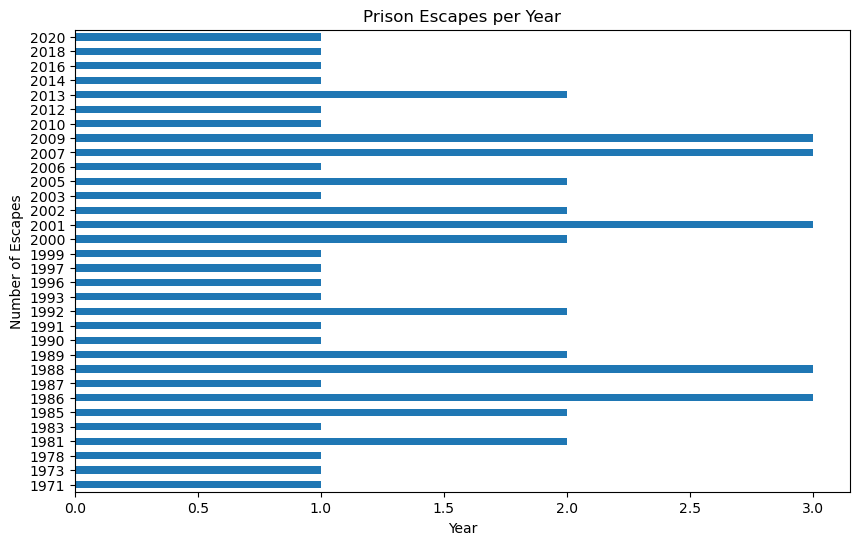

In [9]:
# Plotting the number of prison escapes per year
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')

In [10]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and day of the week from the 'Date' column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group the data by month and count the number of escapes in each month
escapes_per_month = df.groupby('Month').size()

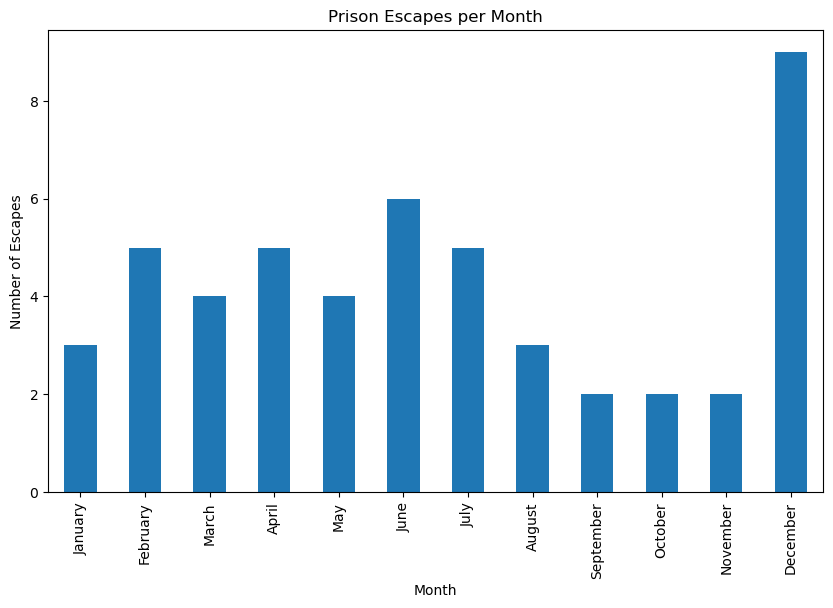

In [11]:
# Plot the number of prison escapes per month
escapes_per_month = escapes_per_month.rename(index=month_names)  # Rename month numbers to month names
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')


# Create a list to map day of the week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by day of the week and count the number of escapes on each day
escapes_per_day = df.groupby('DayOfWeek').size()

# Show the plots
plt.show()


<Axes: title={'center': 'Prison Escapes per Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Escapes'>

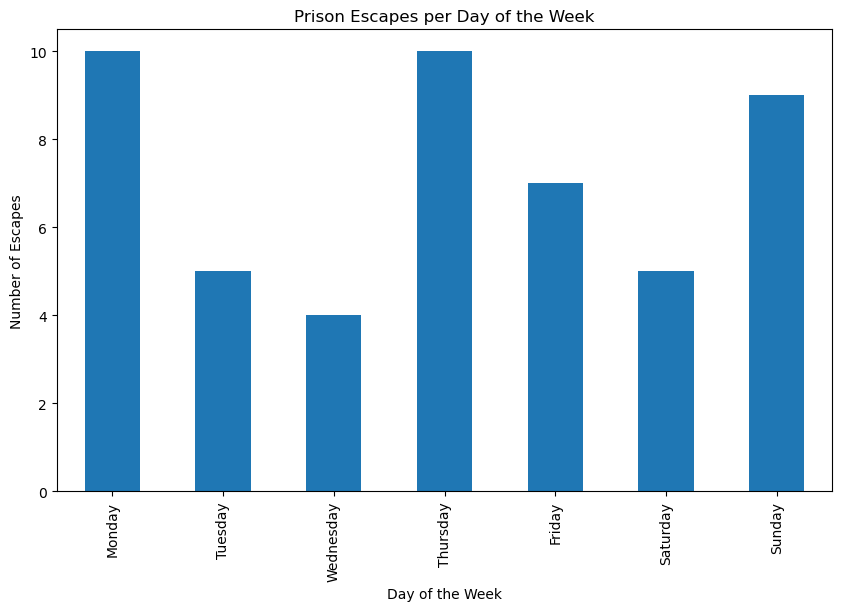

In [12]:
# Plot the number of prison escapes per day of the week
escapes_per_day.index = day_names  # Rename day of the week numbers to day names
escapes_per_day.plot(kind='bar', figsize=(10, 6), xlabel='Day of the Week', ylabel='Number of Escapes',
                     title='Prison Escapes per Day of the Week')

In [13]:
# Group the data by country and count the number of escapes in each country
escapes_per_country = df.groupby('Country').size()

# Sort the countries based on the number of escapes in descending order
top_countries = escapes_per_country.sort_values(ascending=False)

# Print the top countries with the highest number of recorded prison escapes
print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))

Countries with the Highest Number of Recorded Prison Escapes:
Country
France            15
United States      8
Greece             4
Belgium            4
Canada             4
Brazil             2
Colombia           2
Australia          2
United Kingdom     2
Chile              1
dtype: int64


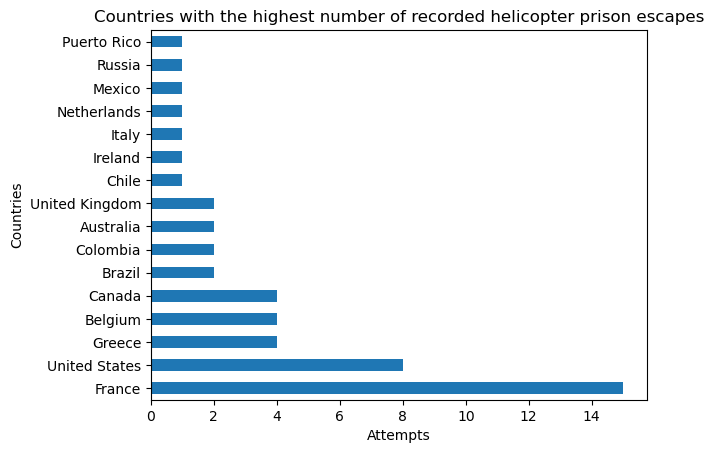

In [14]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

In [16]:
# Count how many succeeded vs failed
success_count = df['Succeeded'].value_counts().get('Yes', 0)
failure_count = df['Succeeded'].value_counts().get('No', 0)

# Total attempts
total = success_count + failure_count

# Percentages
success_percentage = (success_count / total) * 100
failure_percentage = (failure_count / total) * 100

print(f"Total: {total}")
print(f"Success: {success_count} ({success_percentage:.2f}%)")
print(f"Failure: {failure_count} ({failure_percentage:.2f}%)")


Total: 50
Success: 36 (72.00%)
Failure: 14 (28.00%)


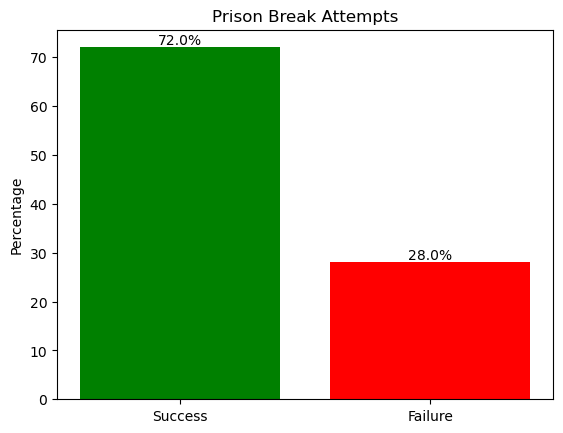

In [18]:
labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['green', 'red']

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)


for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

# Display the chart
plt.show()

In [19]:
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()
print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")

Average Number of Escapees per Incident:
1.02


In [20]:
escaped_individuals = df[df['Escapee(s)'].notnull()]
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')
all_escapees = []
for escapees in individual_escapees:
    all_escapees.extend(escapees)
escapee_counts = pd.Series(all_escapees).value_counts()
persistent_escapees = escapee_counts[escapee_counts > 1]
print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)

Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 8
Michel Vaujour    2
Pascal Payet      2
Name: count, dtype: int64


In [21]:
pd.set_option('display.max_colwidth', 23)
temporary_df = df.dropna(subset=['Escapee(s)'], inplace=False)
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
repeated_escapees = persistent_escapees.index.tolist()
duplicated_df = temporary_df[temporary_df['Escapee(s)'].str.contains('|'.join(repeated_escapees))]
duplicated_df = duplicated_df.reindex(columns=column_order)
print("Recurrent Escapees")
print(duplicated_df)

Recurrent Escapees
        Escapee(s) Succeeded             Prison name       Date      Country
8   Michel Vaujour       Yes      Prison de la Santé 1986-05-26       France
14               —       Yes  Cárcel Bellavista, ... 1988-12-23     Colombia
19               —       Yes             Lyon Prison 1992-02-24       France
20               —        No  Touraine Central Pr... 1992-12-01       France
21  Michel Vaujour        No  Touraine Central Pr... 1993-06-17       France
23               —        No     De Geerhorst prison 1997-09-18  Netherlands
26               —       Yes             Lyon prison 2000-12-13       France
27    Pascal Payet       Yes           Luynes prison 2001-01-19       France
29               —        No          Fresnes prison 2001-05-28       France
30               —       Yes  Parada Neto Peniten... 2002-01-17       Brazil
33               —        No                  France 2005-07-01       France
37    Pascal Payet       Yes           Grasse prison 2007